<div style="position: relative; text-align: center; color: white; height: 400px; width: 100%;">
  <img src="images/portada_ML.webp" alt="Logo del Proyecto" style="width: 100%; height: 100%; object-fit: cover; opacity: 0.7;">
  <div style="position: absolute; top: 50%; left: 50%; transform: translate(-50%, -50%); width: 80%;">
    <h1 style="font-size: 2.5em; background-color: rgba(0, 0, 0, 0.5); padding: 10px;">
      Simulador de Batallas de Superhéroes
    </h1>
    <h2 style="font-size: 1.5em; background-color: rgba(0, 0, 0, 0.5); padding: 5px;">
      Un Enfoque Basado en Machine Learning para Predecir Resultados en el Universo de Cómics y Películas
    </h2>
  </div>
</div>


Bibliotecas 

In [135]:
import ast
import bootcampviztools as bt
import modulo_toolbox as mlt
import numpy as np
import pandas as pd
import seaborn as sns
import toolbox_ML as tl
import matplotlib.pyplot as plt
import joblib

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


CARGAR DATA Y VISUALIZACION

In [136]:
df_pred_battles = pd.read_csv('./data/MCU_DC_final_limpio.csv')

In [137]:
df_pred_battles.info()
df_pred_battles.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48319 entries, 0 to 48318
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Heroe 1              48319 non-null  object
 1   Heroe 2              48319 non-null  object
 2   Resultado_Comics     48319 non-null  int64 
 3   Resultado_Peliculas  48319 non-null  int64 
 4   Resultado_Combinado  48319 non-null  int64 
 5   Universe_1           48319 non-null  object
 6   Intelligence_1       48319 non-null  int64 
 7   Strength_1           48319 non-null  int64 
 8   Speed_1              48319 non-null  int64 
 9   Durability_1         48319 non-null  int64 
 10  Power_1              48319 non-null  int64 
 11  Combat_1             48319 non-null  int64 
 12  Tier_1               48319 non-null  int64 
 13  Tier2_1              48319 non-null  int64 
 14  Superpowers_1        48319 non-null  object
 15  Universe_2           48319 non-null  object
 16  Inte

,Heroe 1,Heroe 2,Resultado_Comics,Resultado_Peliculas,Resultado_Combinado,Universe_1,Intelligence_1,Strength_1,Speed_1,Durability_1,...,Universe_2,Intelligence_2,Strength_2,Speed_2,Durability_2,Power_2,Combat_2,Tier_2,Tier2_2,Superpowers_2
0,Envy,Ancient One,2,1,2,DC Extended Universe,65,65,65,40,...,Marvel Cinematic Universe,85,8,25,25,90,100,4,0,"['Anti-Gravity', 'Astral Projection', 'Dimensi..."
1,Warlock,Ancient One,1,2,1,Marvel Cinematic Universe,45,50,25,35,...,Marvel Cinematic Universe,85,8,25,25,90,100,4,0,"['Anti-Gravity', 'Astral Projection', 'Dimensi..."
2,Deadshot,Ancient One,2,1,2,DC Extended Universe,60,1,6,7,...,Marvel Cinematic Universe,85,8,25,25,90,100,4,0,"['Anti-Gravity', 'Astral Projection', 'Dimensi..."
3,Doctor Fate,Ancient One,1,2,1,DC Extended Universe,85,75,60,45,...,Marvel Cinematic Universe,85,8,25,25,90,100,4,0,"['Anti-Gravity', 'Astral Projection', 'Dimensi..."
4,Cull Obsidian,Ancient One,1,2,1,Marvel Cinematic Universe,60,75,20,40,...,Marvel Cinematic Universe,85,8,25,25,90,100,4,0,"['Anti-Gravity', 'Astral Projection', 'Dimensi..."


LIMPIEZA DATOS

In [138]:
# Normalizacion Heroe 1 y Heroe 2 
df_pred_battles['Heroe 1'] = df_pred_battles['Heroe 1'].str.strip().str.title()
df_pred_battles['Heroe 2'] = df_pred_battles['Heroe 2'].str.strip().str.title()

df_pred_battles[['Heroe 1', 'Heroe 2']].head()

,Heroe 1,Heroe 2
0,Envy,Ancient One
1,Warlock,Ancient One
2,Deadshot,Ancient One
3,Doctor Fate,Ancient One
4,Cull Obsidian,Ancient One


In [139]:
# Normalizar valores en las columnas "Universe_1" y "Universe_2"
df_pred_battles['Universe_1'] = df_pred_battles['Universe_1'].str.strip().str.title()
df_pred_battles['Universe_2'] = df_pred_battles['Universe_2'].str.strip().str.title()

In [140]:
# Mapeo de los universos 
mapping_universe = {
    'Dc Extended Universe': 0,
    'Marvel Cinematic Universe': 1
}

# Aplicar la transformación
df_pred_battles['Universe_1'] = df_pred_battles['Universe_1'].map(mapping_universe)
df_pred_battles['Universe_2'] = df_pred_battles['Universe_2'].map(mapping_universe)

df_pred_battles[['Universe_1', 'Universe_2']].head()


,Universe_1,Universe_2
0,0,1
1,1,1
2,0,1
3,0,1
4,1,1


In [141]:
df_pred_battles.head()

,Heroe 1,Heroe 2,Resultado_Comics,Resultado_Peliculas,Resultado_Combinado,Universe_1,Intelligence_1,Strength_1,Speed_1,Durability_1,...,Universe_2,Intelligence_2,Strength_2,Speed_2,Durability_2,Power_2,Combat_2,Tier_2,Tier2_2,Superpowers_2
0,Envy,Ancient One,2,1,2,0,65,65,65,40,...,1,85,8,25,25,90,100,4,0,"['Anti-Gravity', 'Astral Projection', 'Dimensi..."
1,Warlock,Ancient One,1,2,1,1,45,50,25,35,...,1,85,8,25,25,90,100,4,0,"['Anti-Gravity', 'Astral Projection', 'Dimensi..."
2,Deadshot,Ancient One,2,1,2,0,60,1,6,7,...,1,85,8,25,25,90,100,4,0,"['Anti-Gravity', 'Astral Projection', 'Dimensi..."
3,Doctor Fate,Ancient One,1,2,1,0,85,75,60,45,...,1,85,8,25,25,90,100,4,0,"['Anti-Gravity', 'Astral Projection', 'Dimensi..."
4,Cull Obsidian,Ancient One,1,2,1,1,60,75,20,40,...,1,85,8,25,25,90,100,4,0,"['Anti-Gravity', 'Astral Projection', 'Dimensi..."


In [142]:
df_pred_battles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48319 entries, 0 to 48318
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Heroe 1              48319 non-null  object
 1   Heroe 2              48319 non-null  object
 2   Resultado_Comics     48319 non-null  int64 
 3   Resultado_Peliculas  48319 non-null  int64 
 4   Resultado_Combinado  48319 non-null  int64 
 5   Universe_1           48319 non-null  int64 
 6   Intelligence_1       48319 non-null  int64 
 7   Strength_1           48319 non-null  int64 
 8   Speed_1              48319 non-null  int64 
 9   Durability_1         48319 non-null  int64 
 10  Power_1              48319 non-null  int64 
 11  Combat_1             48319 non-null  int64 
 12  Tier_1               48319 non-null  int64 
 13  Tier2_1              48319 non-null  int64 
 14  Superpowers_1        48319 non-null  object
 15  Universe_2           48319 non-null  int64 
 16  Inte

In [143]:
# Selección de características 
num_features = [
    'Intelligence_1', 'Strength_1', 'Speed_1', 'Durability_1', 'Power_1', 'Combat_1', 'Tier_1', 'Tier2_1', 'Universe_1',
    'Intelligence_2', 'Strength_2', 'Speed_2', 'Durability_2', 'Power_2', 'Combat_2', 'Tier_2', 'Tier2_2', 'Universe_2']

MINI-EDA

In [144]:
tl.describe_df(df_pred_battles)

,Heroe 1,Heroe 2,Resultado_Comics,Resultado_Peliculas,Resultado_Combinado,Universe_1,Intelligence_1,Strength_1,Speed_1,Durability_1,...,Universe_2,Intelligence_2,Strength_2,Speed_2,Durability_2,Power_2,Combat_2,Tier_2,Tier2_2,Superpowers_2
Data type,object,object,int64,int64,int64,int64,int64,int64,int64,int64,...,int64,int64,int64,int64,int64,int64,int64,int64,int64,object
Percent missing (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Unique values,223,223,2,3,3,2,16,24,25,24,...,2,16,24,25,24,25,20,8,6,221
Cardinality percent (%),0.461516,0.461516,0.004139,0.006209,0.006209,0.004139,0.033113,0.04967,0.051739,0.04967,...,0.004139,0.033113,0.04967,0.051739,0.04967,0.051739,0.041392,0.016557,0.012417,0.457377


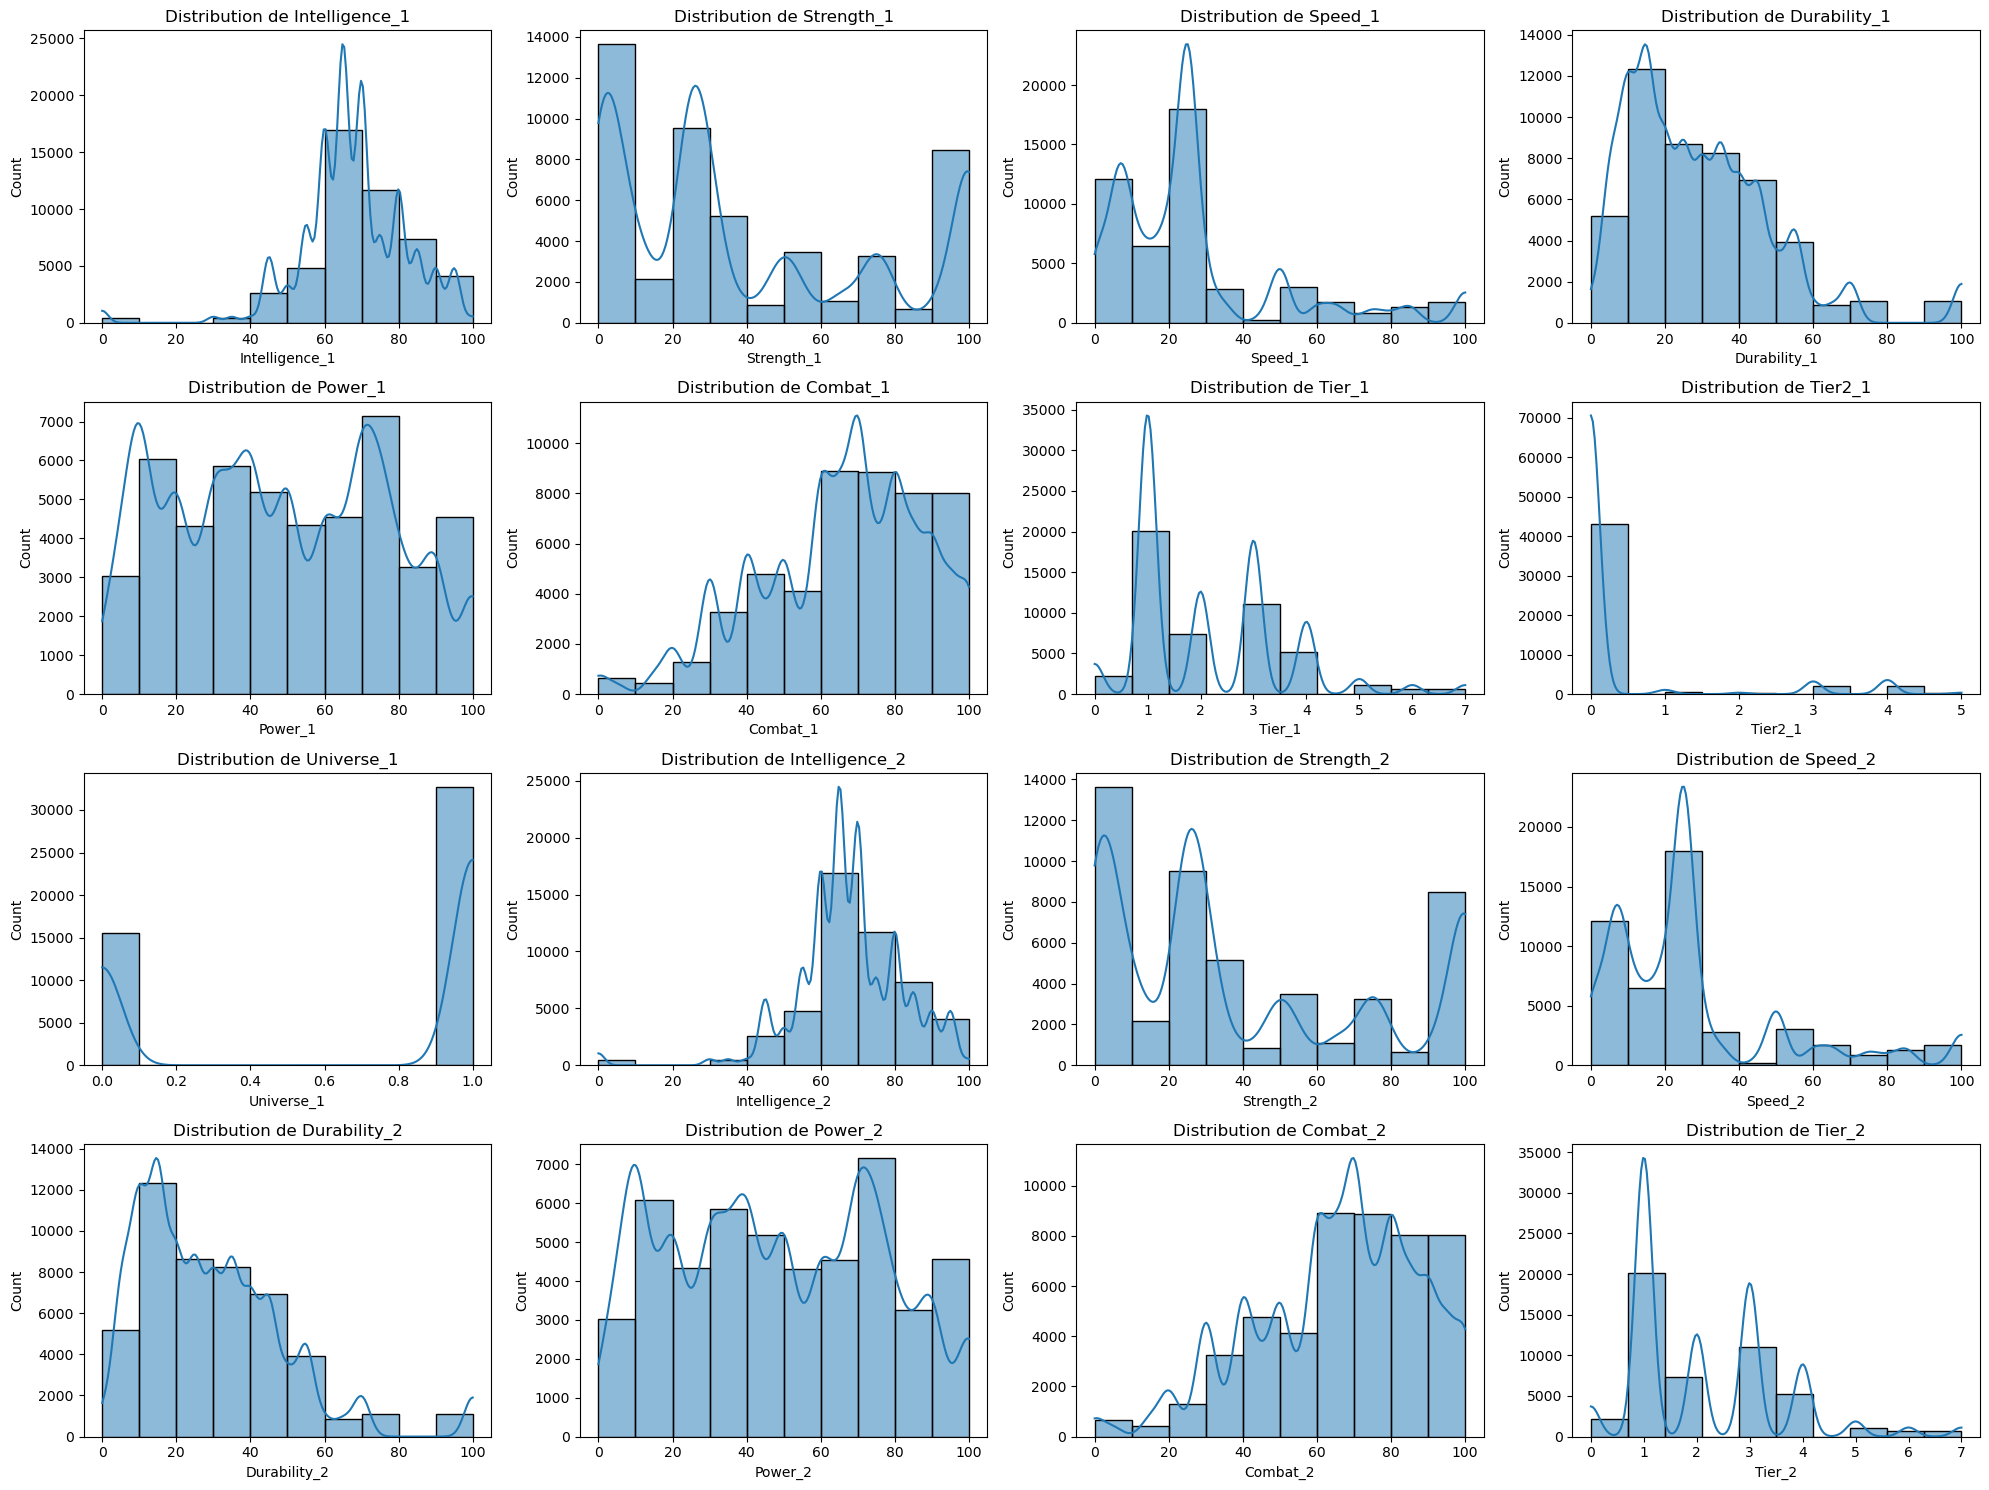

In [109]:
# Visualización de distribuciones
plt.figure(figsize=(20, 15))
for i, feature in enumerate(num_features[:16]):  # Visualizamos las primeras 16 características numéricas
    plt.subplot(4, 4, i + 1)
    sns.histplot(df_pred_battles[feature], bins = 10, kde=True)
    plt.title(f'Distribution de {feature}')
plt.tight_layout()
plt.show()


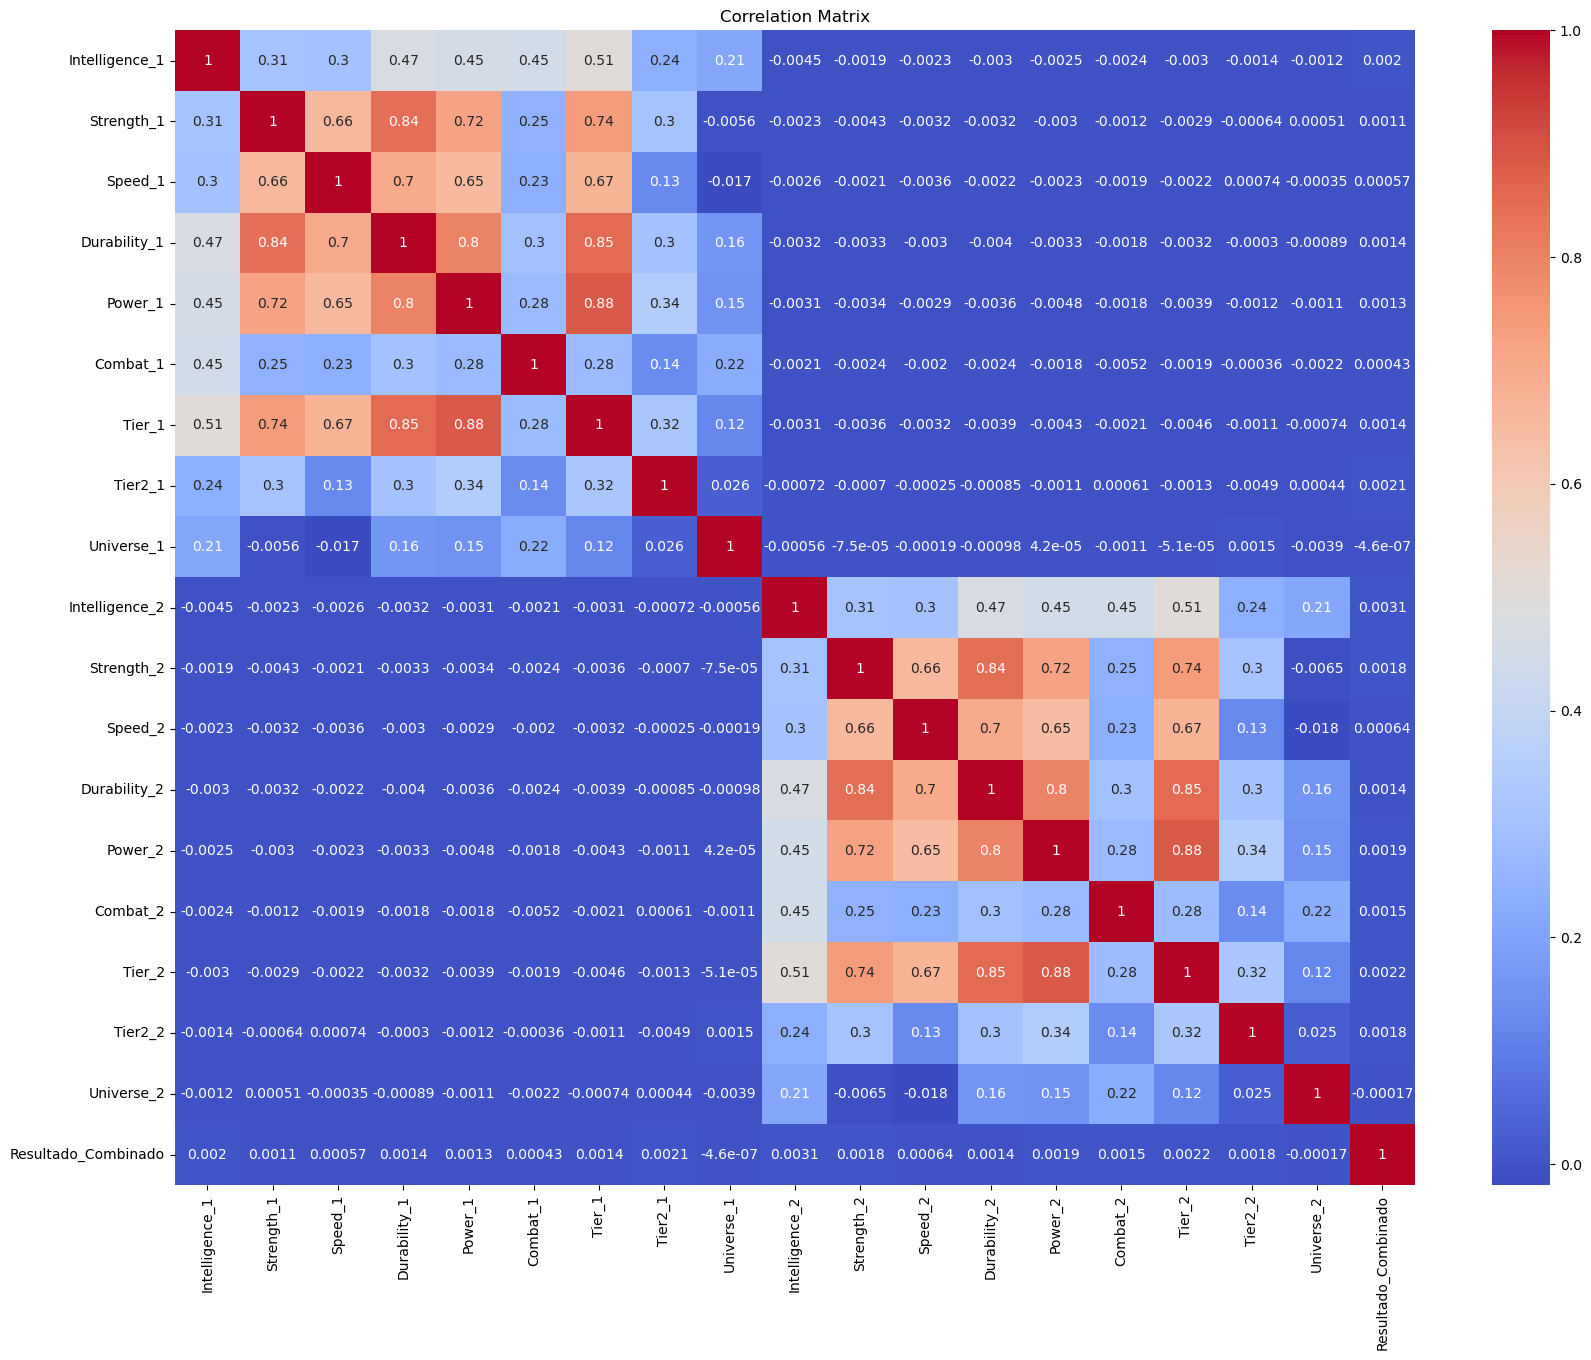

In [20]:
# Correlación entre características y la variable objetivo
correlation_matrix = df_pred_battles[num_features + ['Resultado_Combinado']].corr()

# Heatmap de la matriz de correlación
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Feature Engineering

In [145]:
# Label Encoder Heroe 1 y Heroe 2
label_encoder = LabelEncoder()

df_pred_battles['Heroe_1_encoded'] = label_encoder.fit_transform(df_pred_battles['Heroe 1'])
df_pred_battles['Heroe_2_encoded'] = label_encoder.fit_transform(df_pred_battles['Heroe 2'])

df_pred_battles.head()

,Heroe 1,Heroe 2,Resultado_Comics,Resultado_Peliculas,Resultado_Combinado,Universe_1,Intelligence_1,Strength_1,Speed_1,Durability_1,...,Strength_2,Speed_2,Durability_2,Power_2,Combat_2,Tier_2,Tier2_2,Superpowers_2,Heroe_1_encoded,Heroe_2_encoded
0,Envy,Ancient One,2,1,2,0,65,65,65,40,...,8,25,25,90,100,4,0,"['Anti-Gravity', 'Astral Projection', 'Dimensi...",53,3
1,Warlock,Ancient One,1,2,1,1,45,50,25,35,...,8,25,25,90,100,4,0,"['Anti-Gravity', 'Astral Projection', 'Dimensi...",212,3
2,Deadshot,Ancient One,2,1,2,0,60,1,6,7,...,8,25,25,90,100,4,0,"['Anti-Gravity', 'Astral Projection', 'Dimensi...",39,3
3,Doctor Fate,Ancient One,1,2,1,0,85,75,60,45,...,8,25,25,90,100,4,0,"['Anti-Gravity', 'Astral Projection', 'Dimensi...",42,3
4,Cull Obsidian,Ancient One,1,2,1,1,60,75,20,40,...,8,25,25,90,100,4,0,"['Anti-Gravity', 'Astral Projection', 'Dimensi...",32,3


Modelo sin transformaciones


In [162]:
df_pred_battles

,Heroe 1,Heroe 2,Resultado_Comics,Resultado_Peliculas,Resultado_Combinado,Universe_1,Intelligence_1,Strength_1,Speed_1,Durability_1,...,Strength_2,Speed_2,Durability_2,Power_2,Combat_2,Tier_2,Tier2_2,Superpowers_2,Heroe_1_encoded,Heroe_2_encoded
0,Envy,Ancient One,2,1,2,0,65,65,65,40,...,8,25,25,90,100,4,0,"['Anti-Gravity', 'Astral Projection', 'Dimensi...",53,3
1,Warlock,Ancient One,1,2,1,1,45,50,25,35,...,8,25,25,90,100,4,0,"['Anti-Gravity', 'Astral Projection', 'Dimensi...",212,3
2,Deadshot,Ancient One,2,1,2,0,60,1,6,7,...,8,25,25,90,100,4,0,"['Anti-Gravity', 'Astral Projection', 'Dimensi...",39,3
3,Doctor Fate,Ancient One,1,2,1,0,85,75,60,45,...,8,25,25,90,100,4,0,"['Anti-Gravity', 'Astral Projection', 'Dimensi...",42,3
4,Cull Obsidian,Ancient One,1,2,1,1,60,75,20,40,...,8,25,25,90,100,4,0,"['Anti-Gravity', 'Astral Projection', 'Dimensi...",32,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48314,Black Canary,Star-Lord (Celestial Power),1,2,1,0,55,1,6,5,...,100,25,70,90,65,4,4,"['Accelerated Development', 'Accelerated Heali...",15,182
48315,Unworthy Thor,Star-Lord (Celestial Power),1,2,1,1,70,8,11,15,...,100,25,70,90,65,4,4,"['Accelerated Development', 'Accelerated Heali...",206,182
48316,Rocket Raccoon,Star-Lord (Celestial Power),2,1,2,1,90,5,19,25,...,100,25,70,90,65,4,4,"['Accelerated Development', 'Accelerated Heali...",164,182
48317,Nam-Ek,Star-Lord (Celestial Power),1,2,1,0,65,95,50,40,...,100,25,70,90,65,4,4,"['Accelerated Development', 'Accelerated Heali...",135,182


In [166]:

# Selección de características y variable objetivo
features_original = [
    'Heroe_1_encoded', 'Intelligence_1', 'Strength_1', 'Speed_1', 'Durability_1', 'Power_1', 'Combat_1', 
    'Heroe_2_encoded', 'Intelligence_2', 'Strength_2', 'Speed_2', 'Durability_2', 'Power_2', 'Combat_2']

target = 'Resultado_Combinado'

X_original = df_pred_battles[features_original]
y_original = df_pred_battles[target]

# División de datos en entrenamiento y prueba
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X_original, y_original, test_size=0.2, random_state=42)

# Entrenar el modelo de Random Forest
rf_model_orig = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_orig.fit(X_train_orig, y_train_orig)

# Evaluar el modelo en el conjunto de prueba
rf_orig_predictions = rf_model_orig.predict(X_test_orig)
rf_orig_accuracy = accuracy_score(y_test_orig, rf_orig_predictions)
rf_orig_report = classification_report(y_test_orig, rf_orig_predictions)

print("Original Random Forest Accuracy:", rf_orig_accuracy)
print("Original Random Forest Classification Report:\n", rf_orig_report)

# # Evaluar el modelo en el conjunto de entrenamiento
# rf_orig_train_predictions = rf_model_orig.predict(X_train_orig)
# rf_orig_train_accuracy = accuracy_score(y_train_orig, rf_orig_train_predictions)
# rf_orig_train_report = classification_report(y_train_orig, rf_orig_train_predictions)

# print("Train Accuracy:", rf_orig_train_accuracy)
# print("Train Classification Report:\n", rf_orig_train_report)

Original Random Forest Accuracy: 0.8262624172185431
Original Random Forest Classification Report:
               precision    recall  f1-score   support

           1       0.82      0.83      0.83      4811
           2       0.83      0.83      0.83      4853

    accuracy                           0.83      9664
   macro avg       0.83      0.83      0.83      9664
weighted avg       0.83      0.83      0.83      9664



In [165]:
from sklearn.model_selection import GridSearchCV

# Definir la cuadrícula de hiperparámetros a buscar
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Crear el modelo de Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Configurar GridSearchCV
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                              cv=3, verbose=2, n_jobs=-1)

# Ejecutar la búsqueda de hiperparámetros
rf_grid_search.fit(X_train_orig, y_train_orig)

# Obtener el mejor modelo
best_rf_model = rf_grid_search.best_estimator_

# Evaluar el mejor modelo en el conjunto de prueba
rf_best_predictions = best_rf_model.predict(X_test_orig)
rf_best_accuracy = accuracy_score(y_test_orig, rf_best_predictions)
rf_best_report = classification_report(y_test_orig, rf_best_predictions)

print("Best Random Forest Accuracy:", rf_best_accuracy)
print("Best Random Forest Classification Report:\n", rf_best_report)
print("Best Hyperparameters:", rf_grid_search.best_params_)

# Evaluar el mejor modelo en el conjunto de entrenamiento
rf_best_train_predictions = best_rf_model.predict(X_train_orig)
rf_best_train_accuracy = accuracy_score(y_train_orig, rf_best_train_predictions)
rf_best_train_report = classification_report(y_train_orig, rf_best_train_predictions)

print("Train Accuracy:", rf_best_train_accuracy)
print("Train Classification Report:\n", rf_best_train_report)


Fitting 3 folds for each of 648 candidates, totalling 1944 fits


KeyboardInterrupt: 

Modelo con logaritmicas

In [146]:
# Apply logarithmic transformation and create a new DataFrame with the transformed features
df_pred_log = df_pred_battles[['Heroe 1', 'Heroe 2'] + num_features].copy()
for feature in num_features:
    df_pred_log[feature] = np.log1p(df_pred_log[feature])

In [147]:
df_pred_battles

,Heroe 1,Heroe 2,Resultado_Comics,Resultado_Peliculas,Resultado_Combinado,Universe_1,Intelligence_1,Strength_1,Speed_1,Durability_1,...,Strength_2,Speed_2,Durability_2,Power_2,Combat_2,Tier_2,Tier2_2,Superpowers_2,Heroe_1_encoded,Heroe_2_encoded
0,Envy,Ancient One,2,1,2,0,65,65,65,40,...,8,25,25,90,100,4,0,"['Anti-Gravity', 'Astral Projection', 'Dimensi...",53,3
1,Warlock,Ancient One,1,2,1,1,45,50,25,35,...,8,25,25,90,100,4,0,"['Anti-Gravity', 'Astral Projection', 'Dimensi...",212,3
2,Deadshot,Ancient One,2,1,2,0,60,1,6,7,...,8,25,25,90,100,4,0,"['Anti-Gravity', 'Astral Projection', 'Dimensi...",39,3
3,Doctor Fate,Ancient One,1,2,1,0,85,75,60,45,...,8,25,25,90,100,4,0,"['Anti-Gravity', 'Astral Projection', 'Dimensi...",42,3
4,Cull Obsidian,Ancient One,1,2,1,1,60,75,20,40,...,8,25,25,90,100,4,0,"['Anti-Gravity', 'Astral Projection', 'Dimensi...",32,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48314,Black Canary,Star-Lord (Celestial Power),1,2,1,0,55,1,6,5,...,100,25,70,90,65,4,4,"['Accelerated Development', 'Accelerated Heali...",15,182
48315,Unworthy Thor,Star-Lord (Celestial Power),1,2,1,1,70,8,11,15,...,100,25,70,90,65,4,4,"['Accelerated Development', 'Accelerated Heali...",206,182
48316,Rocket Raccoon,Star-Lord (Celestial Power),2,1,2,1,90,5,19,25,...,100,25,70,90,65,4,4,"['Accelerated Development', 'Accelerated Heali...",164,182
48317,Nam-Ek,Star-Lord (Celestial Power),1,2,1,0,65,95,50,40,...,100,25,70,90,65,4,4,"['Accelerated Development', 'Accelerated Heali...",135,182


In [148]:
df_pred_log

,Heroe 1,Heroe 2,Intelligence_1,Strength_1,Speed_1,Durability_1,Power_1,Combat_1,Tier_1,Tier2_1,Universe_1,Intelligence_2,Strength_2,Speed_2,Durability_2,Power_2,Combat_2,Tier_2,Tier2_2,Universe_2
0,Envy,Ancient One,4.189655,4.189655,4.189655,3.713572,4.110874,4.189655,1.386294,0.0,0.000000,4.454347,2.197225,3.258097,3.258097,4.51086,4.615121,1.609438,0.000000,0.693147
1,Warlock,Ancient One,3.828641,3.931826,3.258097,3.583519,4.110874,4.110874,1.098612,0.0,0.693147,4.454347,2.197225,3.258097,3.258097,4.51086,4.615121,1.609438,0.000000,0.693147
2,Deadshot,Ancient One,4.110874,0.693147,1.945910,2.079442,2.890372,3.828641,0.693147,0.0,0.000000,4.454347,2.197225,3.258097,3.258097,4.51086,4.615121,1.609438,0.000000,0.693147
3,Doctor Fate,Ancient One,4.454347,4.330733,4.110874,3.828641,4.454347,4.262680,1.386294,0.0,0.000000,4.454347,2.197225,3.258097,3.258097,4.51086,4.615121,1.609438,0.000000,0.693147
4,Cull Obsidian,Ancient One,4.110874,4.330733,3.044522,3.713572,3.931826,4.262680,1.386294,0.0,0.693147,4.454347,2.197225,3.258097,3.258097,4.51086,4.615121,1.609438,0.000000,0.693147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48314,Black Canary,Star-Lord (Celestial Power),4.025352,0.693147,1.945910,1.791759,3.583519,3.713572,0.693147,0.0,0.000000,4.262680,4.615121,3.258097,4.262680,4.51086,4.189655,1.609438,1.609438,0.693147
48315,Unworthy Thor,Star-Lord (Celestial Power),4.262680,2.197225,2.484907,2.772589,2.772589,4.330733,0.693147,0.0,0.693147,4.262680,4.615121,3.258097,4.262680,4.51086,4.189655,1.609438,1.609438,0.693147
48316,Rocket Raccoon,Star-Lord (Celestial Power),4.510860,1.791759,2.995732,3.258097,3.258097,4.189655,0.693147,0.0,0.693147,4.262680,4.615121,3.258097,4.262680,4.51086,4.189655,1.609438,1.609438,0.693147
48317,Nam-Ek,Star-Lord (Celestial Power),4.189655,4.564348,3.931826,3.713572,4.262680,4.189655,1.386294,0.0,0.000000,4.262680,4.615121,3.258097,4.262680,4.51086,4.189655,1.609438,1.609438,0.693147


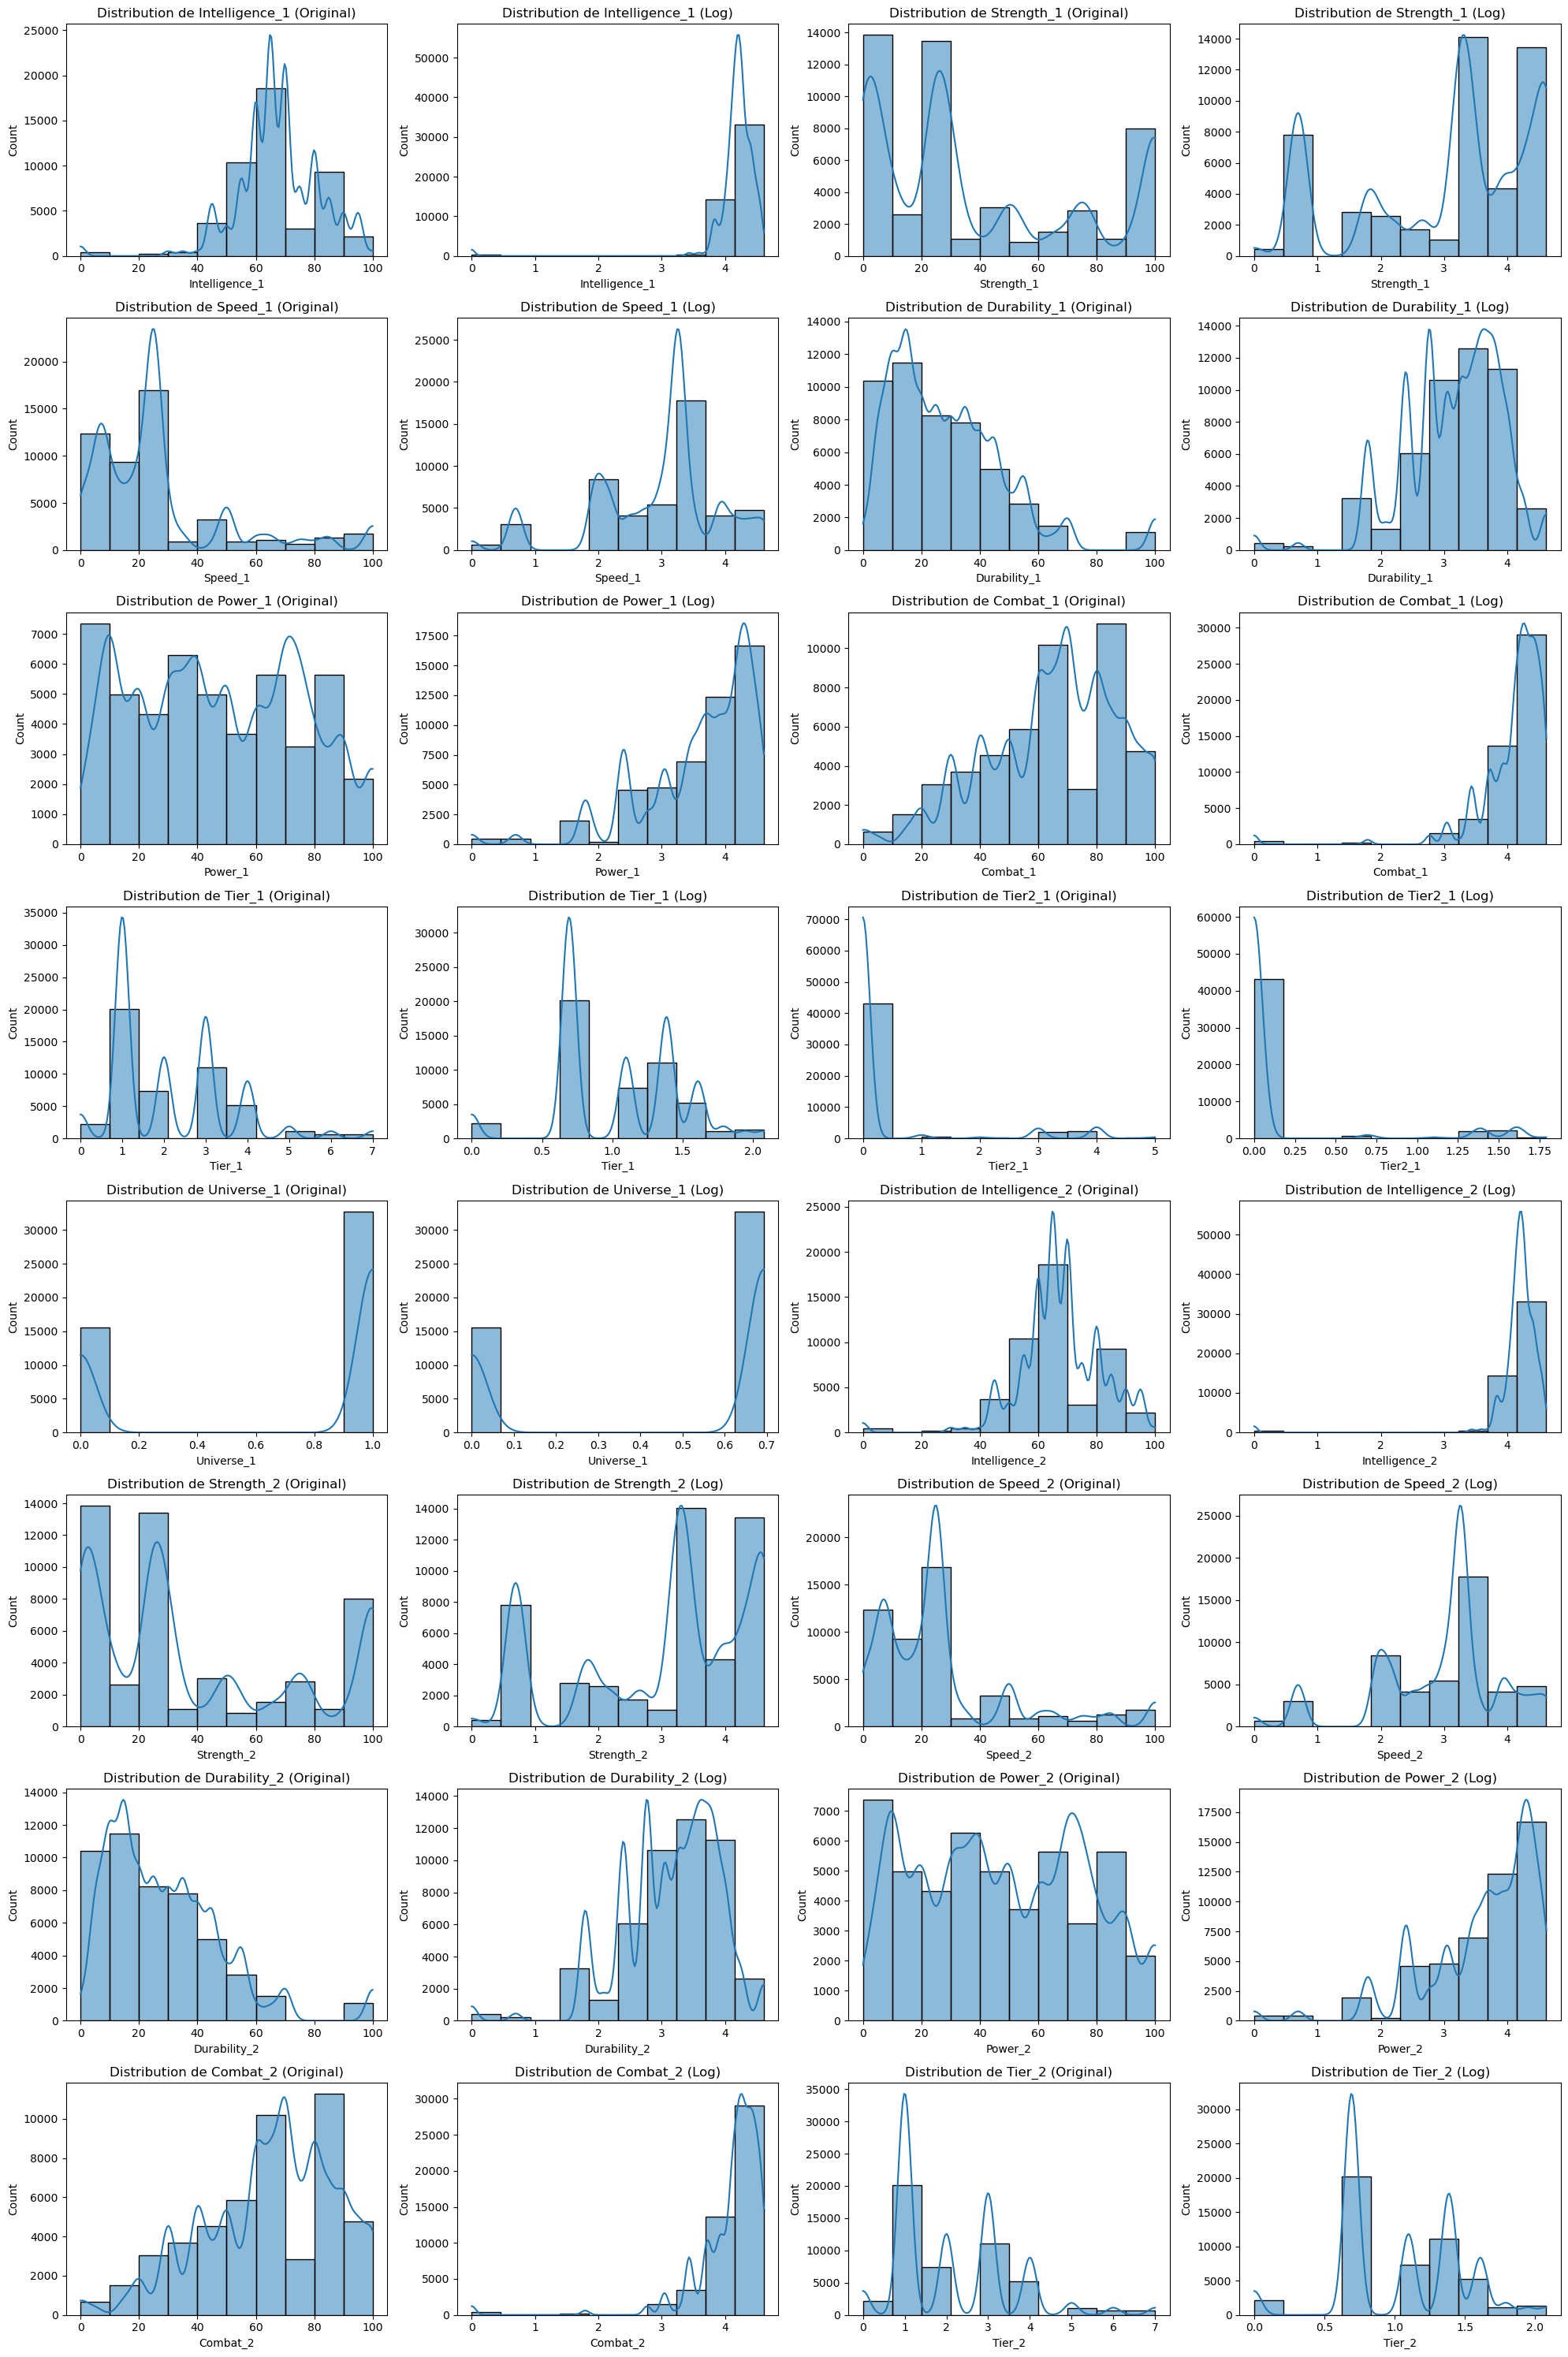

In [112]:
# Reverting the log transformation for comparison purposes
df_pred_battles_original = df_pred_battles.copy()

# Undoing the log1p transformation for original features
for feature in num_features:
    df_pred_battles_original[feature] = np.expm1(df_pred_battles[feature])

# Plotting original and log-transformed distributions side by side for comparison
plt.figure(figsize=(20, 30))
for i, feature in enumerate(num_features[:16]):  # Visualizamos las primeras 16 características numéricas
    plt.subplot(8, 4, i * 2 + 1)
    sns.histplot(df_pred_battles_original[feature], bins=10, kde=True)
    plt.title(f'Distribution de {feature} (Original)')
    
    plt.subplot(8, 4, i * 2 + 2)
    sns.histplot(df_pred_battles[feature], bins=10, kde=True)
    plt.title(f'Distribution de {feature} (Log)')

plt.tight_layout()
plt.show()


In [153]:
df_pred_log['Resultado_Combinado'] = df_pred_battles['Resultado_Combinado']
df_pred_log

,Heroe 1,Heroe 2,Intelligence_1,Strength_1,Speed_1,Durability_1,Power_1,Combat_1,Tier_1,Tier2_1,...,Intelligence_2,Strength_2,Speed_2,Durability_2,Power_2,Combat_2,Tier_2,Tier2_2,Universe_2,Resultado_Combinado
0,Envy,Ancient One,4.189655,4.189655,4.189655,3.713572,4.110874,4.189655,1.386294,0.0,...,4.454347,2.197225,3.258097,3.258097,4.51086,4.615121,1.609438,0.000000,0.693147,2
1,Warlock,Ancient One,3.828641,3.931826,3.258097,3.583519,4.110874,4.110874,1.098612,0.0,...,4.454347,2.197225,3.258097,3.258097,4.51086,4.615121,1.609438,0.000000,0.693147,1
2,Deadshot,Ancient One,4.110874,0.693147,1.945910,2.079442,2.890372,3.828641,0.693147,0.0,...,4.454347,2.197225,3.258097,3.258097,4.51086,4.615121,1.609438,0.000000,0.693147,2
3,Doctor Fate,Ancient One,4.454347,4.330733,4.110874,3.828641,4.454347,4.262680,1.386294,0.0,...,4.454347,2.197225,3.258097,3.258097,4.51086,4.615121,1.609438,0.000000,0.693147,1
4,Cull Obsidian,Ancient One,4.110874,4.330733,3.044522,3.713572,3.931826,4.262680,1.386294,0.0,...,4.454347,2.197225,3.258097,3.258097,4.51086,4.615121,1.609438,0.000000,0.693147,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48314,Black Canary,Star-Lord (Celestial Power),4.025352,0.693147,1.945910,1.791759,3.583519,3.713572,0.693147,0.0,...,4.262680,4.615121,3.258097,4.262680,4.51086,4.189655,1.609438,1.609438,0.693147,1
48315,Unworthy Thor,Star-Lord (Celestial Power),4.262680,2.197225,2.484907,2.772589,2.772589,4.330733,0.693147,0.0,...,4.262680,4.615121,3.258097,4.262680,4.51086,4.189655,1.609438,1.609438,0.693147,1
48316,Rocket Raccoon,Star-Lord (Celestial Power),4.510860,1.791759,2.995732,3.258097,3.258097,4.189655,0.693147,0.0,...,4.262680,4.615121,3.258097,4.262680,4.51086,4.189655,1.609438,1.609438,0.693147,2
48317,Nam-Ek,Star-Lord (Celestial Power),4.189655,4.564348,3.931826,3.713572,4.262680,4.189655,1.386294,0.0,...,4.262680,4.615121,3.258097,4.262680,4.51086,4.189655,1.609438,1.609438,0.693147,1


In [114]:
# Selección de características y variable objetivo
features_log = [
    'Heroe_1_encoded','Intelligence_1', 'Strength_1', 'Speed_1', 'Durability_1', 'Power_1', 'Combat_1', 'Tier_1', 'Tier2_1', 'Universe_1',
    'Heroe_2_encoded', 'Intelligence_2', 'Strength_2', 'Speed_2', 'Durability_2', 'Power_2', 'Combat_2', 'Tier_2', 'Tier2_2', 'Universe_2']

target = 'Resultado_Combinado'

X = df_pred_battles[features_log]
y = df_pred_battles[target]

# Division datos en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [154]:
# Entrenar el modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Evaluar el modelo Random Forest
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_report = classification_report(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Classification Report:\n", rf_report)

# Entrenar el modelo XGBoost
xgb_model = XGBClassifier(n_estimators=50, use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)

# Evaluar el modelo XGBoost
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
xgb_report = classification_report(y_test, xgb_predictions)
print("XGBoost Accuracy:", xgb_accuracy)
print("XGBoost Classification Report:\n", xgb_report)

Random Forest Accuracy: 0.8374379139072847
Random Forest Classification Report:
               precision    recall  f1-score   support

           1       0.83      0.84      0.84      4811
           2       0.84      0.83      0.84      4853

    accuracy                           0.84      9664
   macro avg       0.84      0.84      0.84      9664
weighted avg       0.84      0.84      0.84      9664

XGBoost Accuracy: 0.6084437086092715
XGBoost Classification Report:
               precision    recall  f1-score   support

           1       0.61      0.59      0.60      4811
           2       0.61      0.62      0.62      4853

    accuracy                           0.61      9664
   macro avg       0.61      0.61      0.61      9664
weighted avg       0.61      0.61      0.61      9664



In [155]:
from sklearn.model_selection import GridSearchCV

# Definir la cuadrícula de hiperparámetros a buscar
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Crear el modelo de Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Configurar GridSearchCV
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                              cv=3, verbose=2, n_jobs=-1)

# Ejecutar la búsqueda de hiperparámetros
rf_grid_search.fit(X_train, y_train)

# Obtener el mejor modelo
best_rf_model = rf_grid_search.best_estimator_

# Evaluar el mejor modelo
rf_best_predictions = best_rf_model.predict(X_test)
rf_best_accuracy = accuracy_score(y_test, rf_best_predictions)
rf_best_report = classification_report(y_test, rf_best_predictions)

print("Best Random Forest Accuracy:", rf_best_accuracy)
print("Best Random Forest Classification Report:\n", rf_best_report)
print("Best Hyperparameters:", rf_grid_search.best_params_)


Fitting 3 folds for each of 648 candidates, totalling 1944 fits
Best Random Forest Accuracy: 0.9432947019867549
Best Random Forest Classification Report:
               precision    recall  f1-score   support

           1       0.95      0.94      0.94      4811
           2       0.94      0.95      0.94      4853

    accuracy                           0.94      9664
   macro avg       0.94      0.94      0.94      9664
weighted avg       0.94      0.94      0.94      9664

Best Hyperparameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [156]:
# Evaluar el modelo en el conjunto de entrenamiento
rf_train_predictions = best_rf_model.predict(X_train)
rf_train_accuracy = accuracy_score(y_train, rf_train_predictions)
rf_train_report = classification_report(y_train, rf_train_predictions)

# Evaluar el modelo en el conjunto de prueba
rf_test_predictions = best_rf_model.predict(X_test)
rf_test_accuracy = accuracy_score(y_test, rf_test_predictions)
rf_test_report = classification_report(y_test, rf_test_predictions)

print("Train Accuracy:", rf_train_accuracy)
print("Train Classification Report:\n", rf_train_report)
print("Test Accuracy:", rf_test_accuracy)
print("Test Classification Report:\n", rf_test_report)


Train Accuracy: 1.0
Train Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00     19215
           2       1.00      1.00      1.00     19436

    accuracy                           1.00     38655
   macro avg       1.00      1.00      1.00     38655
weighted avg       1.00      1.00      1.00     38655

Test Accuracy: 0.9432947019867549
Test Classification Report:
               precision    recall  f1-score   support

           1       0.95      0.94      0.94      4811
           2       0.94      0.95      0.94      4853

    accuracy                           0.94      9664
   macro avg       0.94      0.94      0.94      9664
weighted avg       0.94      0.94      0.94      9664



MODELO FEATURES NORMALIZADAS (Sin superpowers)

In [50]:
features_normalize = [
    'Intelligence_1', 'Strength_1', 'Speed_1', 'Durability_1', 'Power_1', 'Combat_1', 'Tier_1', 'Tier2_1',
    'Intelligence_2', 'Strength_2', 'Speed_2', 'Durability_2', 'Power_2', 'Combat_2', 'Tier_2', 'Tier2_2']

In [51]:
# Normalizar las características numéricas especificadas
scaler = StandardScaler()
df_pred_battles[features_normalize] = scaler.fit_transform(df_pred_battles[features_normalize])

In [52]:
# Selección de características y variable objetivo
features = [
    'Heroe_1_encoded','Intelligence_1', 'Strength_1', 'Speed_1', 'Durability_1', 'Power_1', 'Combat_1', 'Tier_1', 'Tier2_1', 'Universe_1',
    'Heroe_2_encoded', 'Intelligence_2', 'Strength_2', 'Speed_2', 'Durability_2', 'Power_2', 'Combat_2', 'Tier_2', 'Tier2_2', 'Universe_2']

target = 'Resultado_Combinado'

X = df_pred_battles[features]
y = df_pred_battles[target]

# Division datos en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [167]:
X_test.head(1)

,Heroe_1_encoded,Intelligence_1,Strength_1,Speed_1,Durability_1,Power_1,Combat_1,Tier_1,Tier2_1,Universe_1,Heroe_2_encoded,Intelligence_2,Strength_2,Speed_2,Durability_2,Power_2,Combat_2,Tier_2,Tier2_2,Universe_2
44188,0,4.189655,4.615121,3.258097,3.931826,4.189655,4.26268,1.386294,1.386294,0.693147,152,4.110874,0.693147,1.94591,2.397895,3.583519,3.583519,0.693147,0.0,0.0


In [53]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((38655, 20), (9664, 20), (38655,), (9664,))

In [58]:
# Modelo Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Modelo XGBoost
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)

# Modelo Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

# Reportes de clasificación
rf_report = classification_report(y_test, rf_predictions)
xgb_report = classification_report(y_test, xgb_predictions)
lr_report = classification_report(y_test, lr_predictions)

print("Random Forest Report:\n", rf_report)
print("XGBoost Report:\n", xgb_report)
print("Logistic Regression Report:\n", lr_report)

Random Forest Report:
               precision    recall  f1-score   support

           1       0.83      0.84      0.84      4811
           2       0.84      0.83      0.84      4853

    accuracy                           0.84      9664
   macro avg       0.84      0.84      0.84      9664
weighted avg       0.84      0.84      0.84      9664

XGBoost Report:
               precision    recall  f1-score   support

           1       0.64      0.63      0.63      4811
           2       0.63      0.64      0.64      4853

    accuracy                           0.63      9664
   macro avg       0.63      0.63      0.63      9664
weighted avg       0.63      0.63      0.63      9664

Logistic Regression Report:
               precision    recall  f1-score   support

           1       0.48      0.25      0.33      4811
           2       0.50      0.73      0.59      4853

    accuracy                           0.49      9664
   macro avg       0.49      0.49      0.46      9664
weigh

Random Forest

Precisión: 0.83 (clase 1), 0.84 (clase 2)
Recall: 0.84 (clase 1), 0.83 (clase 2)
F1-score: 0.84 (clase 1), 0.84 (clase 2)
Accuracy: 0.84


XGBoost

Precisión: 0.64 (clase 1), 0.63 (clase 2)
Recall: 0.63 (clase 1), 0.64 (clase 2)
F1-score: 0.63 (clase 1), 0.64 (clase 2)
Accuracy: 0.63


Logistic Regression

Precisión: 0.48 (clase 1), 0.49 (clase 2)
Recall: 0.28 (clase 1), 0.69 (clase 2)
F1-score: 0.35 (clase 1), 0.58 (clase 2)
Accuracy: 0.49

In [59]:
# Definir los hiperparámetros a probar
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [10, 20, 30],
    'min_samples_leaf': [4, 6, 8],
    'bootstrap': [True],
    'max_features': ['sqrt'],
    'class_weight': ['balanced']
}

# Configurar el GridSearchCV con el modelo Random Forest
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), 
                           param_grid=param_grid, 
                           cv=3, 
                           n_jobs=-1, 
                           verbose=2)

# Ejecutar el GridSearchCV
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True], 'class_weight': ['balanced'],
                         'max_depth': [5, 10, 20], 'max_features': ['sqrt'],
                         'min_samples_leaf': [4, 6, 8],
                         'min_samples_split': [10, 20, 30],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [60]:
# Obtener los mejores hiperparámetros y el mejor modelo
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

print("Best Parameters:\n", best_params)

Best Parameters:
 {'bootstrap': True, 'class_weight': 'balanced', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}


In [61]:
# Evaluar el modelo optimizado en el conjunto de prueba
rf_optimized_predictions = best_rf_model.predict(X_test)
rf_optimized_report = classification_report(y_test, rf_optimized_predictions)

print("Optimized Random Forest Report:\n", rf_optimized_report)


Optimized Random Forest Report:
               precision    recall  f1-score   support

           1       0.74      0.73      0.74      4811
           2       0.74      0.74      0.74      4853

    accuracy                           0.74      9664
   macro avg       0.74      0.74      0.74      9664
weighted avg       0.74      0.74      0.74      9664



In [62]:
# Evaluar el modelo optimizado en el conjunto de entrenamiento
rf_optimized_train_predictions = best_rf_model.predict(X_train)
rf_optimized_train_report = classification_report(y_train, rf_optimized_train_predictions)
train_accuracy = accuracy_score(y_train, rf_optimized_train_predictions)

# Evaluar el modelo optimizado en el conjunto de prueba
rf_optimized_test_predictions = best_rf_model.predict(X_test)
rf_optimized_test_report = classification_report(y_test, rf_optimized_test_predictions)
test_accuracy = accuracy_score(y_test, rf_optimized_test_predictions)

print("Reporte de Clasificación del Modelo Optimizado en el Conjunto de Entrenamiento:")
print(rf_optimized_train_report)
print(f"Precisión en el conjunto de entrenamiento: {train_accuracy}")

print("\nReporte de Clasificación del Modelo Optimizado en el Conjunto de Prueba:")
print(rf_optimized_test_report)
print(f"Precisión en el conjunto de prueba: {test_accuracy}")

# Comparar las métricas de precisión
precision_diff = train_accuracy - test_accuracy
print(f"Diferencia en precisión entre entrenamiento y prueba: {precision_diff:.4f}")


Reporte de Clasificación del Modelo Optimizado en el Conjunto de Entrenamiento:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.97      0.97      0.97     19215
           2       0.97      0.97      0.97     19436

    accuracy                           0.97     38655
   macro avg       0.98      0.98      0.98     38655
weighted avg       0.97      0.97      0.97     38655

Precisión en el conjunto de entrenamiento: 0.9685163626956409

Reporte de Clasificación del Modelo Optimizado en el Conjunto de Prueba:
              precision    recall  f1-score   support

           1       0.74      0.73      0.74      4811
           2       0.74      0.74      0.74      4853

    accuracy                           0.74      9664
   macro avg       0.74      0.74      0.74      9664
weighted avg       0.74      0.74      0.74      9664

Precisión en el conjunto de prueba: 0.7388245033112583
Diferencia en precisi

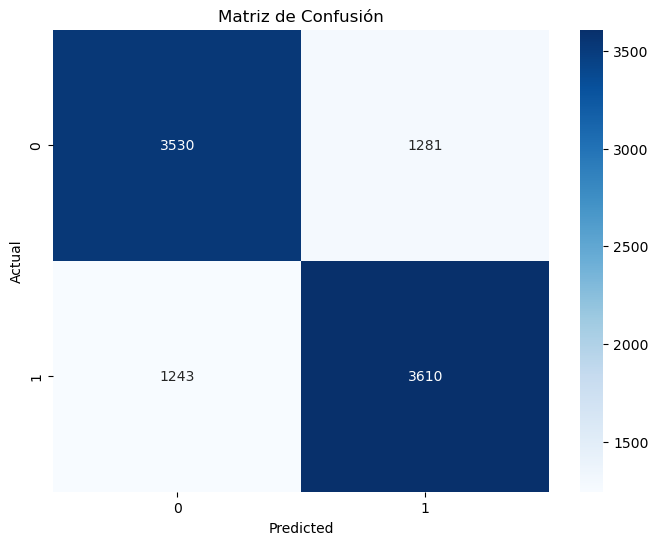

In [65]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import seaborn as sns

# Matriz de Confusión
conf_matrix = confusion_matrix(y_test, rf_optimized_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



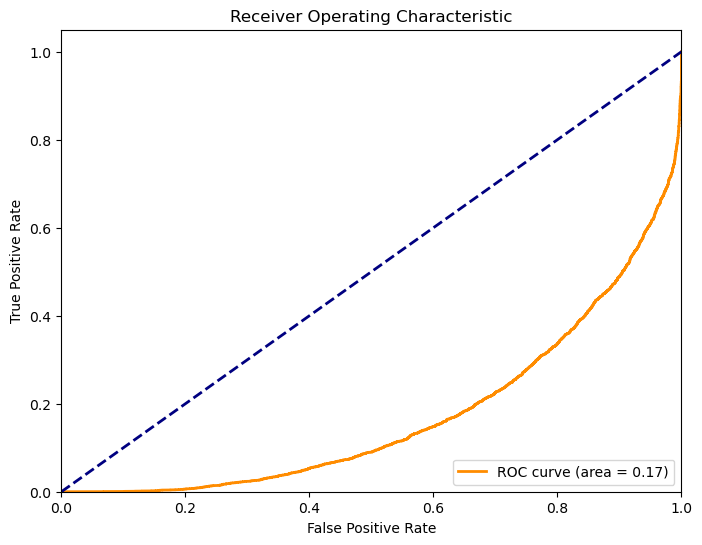

In [66]:
from sklearn.metrics import roc_curve, auc

# Curva ROC - Ajuste para etiquetas 1 y 2
fpr, tpr, _ = roc_curve(y_test, best_rf_model.predict_proba(X_test)[:, 1], pos_label=2)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


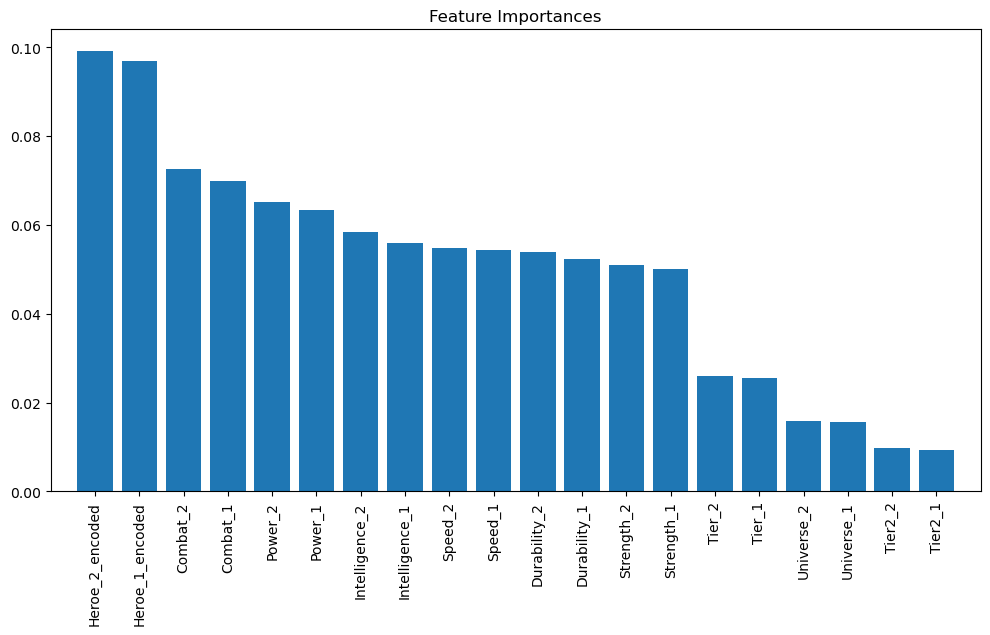

In [43]:
# Obtener la importancia de las características
importances = best_rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
features = np.array(features)

# Visualizar la importancia de las características
plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), features[indices], rotation=90)
plt.xlim([-1, len(importances)])
plt.show()


Random Forest Report (without hero identifiers):
               precision    recall  f1-score   support

           1       0.78      0.79      0.78      4811
           2       0.79      0.78      0.78      4853

    accuracy                           0.78      9664
   macro avg       0.78      0.78      0.78      9664
weighted avg       0.78      0.78      0.78      9664



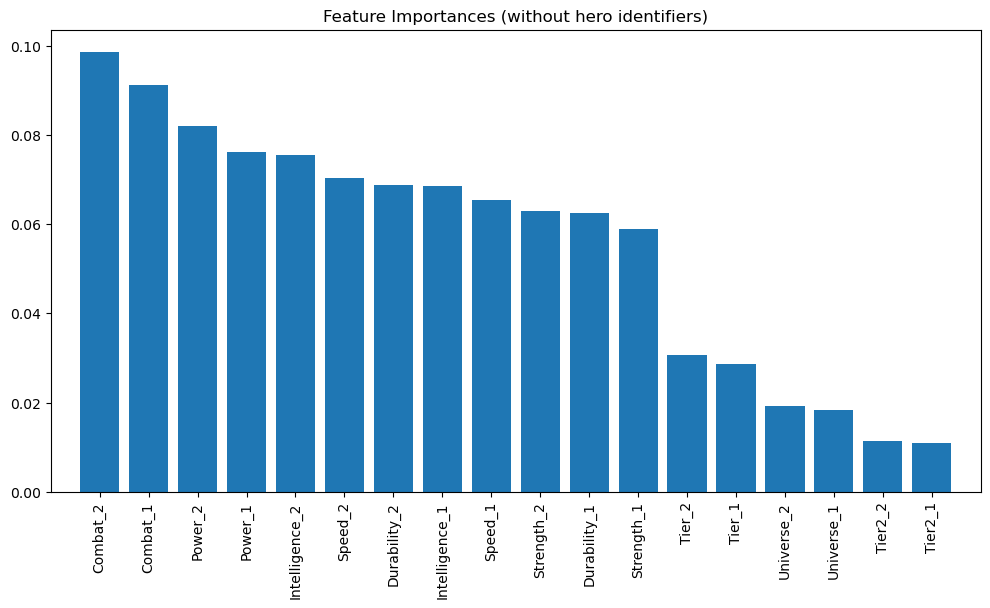

In [44]:
# Selección de características sin los identificadores de los héroes
features_without_heroes = [
    'Intelligence_1', 'Strength_1', 'Speed_1', 'Durability_1', 'Power_1', 'Combat_1', 'Tier_1', 'Tier2_1', 'Universe_1',
    'Intelligence_2', 'Strength_2', 'Speed_2', 'Durability_2', 'Power_2', 'Combat_2', 'Tier_2', 'Tier2_2', 'Universe_2']

X_without_heroes = df_pred_battles[features_without_heroes]

# División de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_without_heroes, y, test_size=0.2, random_state=42)

# Entrenar el modelo nuevamente
rf_model_no_heroes = RandomForestClassifier(random_state=42)
rf_model_no_heroes.fit(X_train, y_train)
rf_predictions_no_heroes = rf_model_no_heroes.predict(X_test)

# Evaluar el modelo
rf_report_no_heroes = classification_report(y_test, rf_predictions_no_heroes)
print("Random Forest Report (without hero identifiers):\n", rf_report_no_heroes)

# Importancia de características sin los identificadores
importances_no_heroes = rf_model_no_heroes.feature_importances_
indices_no_heroes = np.argsort(importances_no_heroes)[::-1]
features_no_heroes = np.array(features_without_heroes)

# Visualizar la importancia de las características sin los identificadores
plt.figure(figsize=(12, 6))
plt.title("Feature Importances (without hero identifiers)")
plt.bar(range(len(importances_no_heroes)), importances_no_heroes[indices_no_heroes], align="center")
plt.xticks(range(len(importances_no_heroes)), features_no_heroes[indices_no_heroes], rotation=90)
plt.xlim([-1, len(importances_no_heroes)])
plt.show()


In [45]:
from sklearn.model_selection import cross_val_score

# Validación cruzada
scores = cross_val_score(rf_model_no_heroes, X_without_heroes, y, cv=5)
print("Cross-validation scores (without hero identifiers):", scores)
print("Mean cross-validation score:", scores.mean())


Cross-validation scores (without hero identifiers): [0.49968957 0.61040977 0.5682947  0.47785596 0.54765601]
Mean cross-validation score: 0.5407812014902204


Cambio hiperparametros

In [39]:
# Definir los hiperparámetros 
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_leaf_nodes': [None, 10, 20, 30],
    'class_weight': [None, 'balanced', 'balanced_subsample']
}

# Configurar el GridSearchCV con el modelo Random Forest
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), 
                           param_grid=param_grid, 
                           cv=3, 
                           n_jobs=-1, 
                           verbose=2)

# Ejecutar el GridSearchCV
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros y el mejor modelo
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

# Evaluar el modelo optimizado en el conjunto de prueba
rf_optimized_predictions = best_rf_model.predict(X_test)
rf_optimized_report = classification_report(y_test, rf_optimized_predictions)
print("Mejores Hiperparámetros:", best_params)
print("Reporte de Clasificación del Modelo Optimizado en el Conjunto de Prueba:")
print(rf_optimized_report)


Fitting 3 folds for each of 7776 candidates, totalling 23328 fits
Mejores Hiperparámetros: {'bootstrap': False, 'class_weight': None, 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Reporte de Clasificación del Modelo Optimizado en el Conjunto de Prueba:
              precision    recall  f1-score   support

           1       0.95      0.94      0.94      4811
           2       0.94      0.95      0.94      4853

    accuracy                           0.94      9664
   macro avg       0.94      0.94      0.94      9664
weighted avg       0.94      0.94      0.94      9664



In [41]:
# Guardar el modelo optimizado en un archivo
joblib_file = "best_random_forest_model.pkl"
joblib.dump(best_rf_model, joblib_file)

print(f"Modelo guardado en {joblib_file}")


Modelo guardado en best_random_forest_model.pkl


In [1]:
rf_mod = 'best_rf_model_adjusted.pkl'
model = joblib.load(rf_mod)

NameError: name 'joblib' is not defined

In [42]:

# Evaluar el modelo optimizado en el conjunto de entrenamiento
rf_optimized_train_predictions = best_rf_model.predict(X_train)
rf_optimized_train_report = classification_report(y_train, rf_optimized_train_predictions)
train_accuracy = accuracy_score(y_train, rf_optimized_train_predictions)

# Evaluar el modelo optimizado en el conjunto de prueba
rf_optimized_test_predictions = best_rf_model.predict(X_test)
rf_optimized_test_report = classification_report(y_test, rf_optimized_test_predictions)
test_accuracy = accuracy_score(y_test, rf_optimized_test_predictions)

print("Reporte de Clasificación del Modelo Optimizado en el Conjunto de Entrenamiento:")
print(rf_optimized_train_report)
print(f"Precisión en el conjunto de entrenamiento: {train_accuracy}")

print("\nReporte de Clasificación del Modelo Optimizado en el Conjunto de Prueba:")
print(rf_optimized_test_report)
print(f"Precisión en el conjunto de prueba: {test_accuracy}")


Reporte de Clasificación del Modelo Optimizado en el Conjunto de Entrenamiento:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00     19215
           2       1.00      1.00      1.00     19436

    accuracy                           1.00     38655
   macro avg       1.00      1.00      1.00     38655
weighted avg       1.00      1.00      1.00     38655

Precisión en el conjunto de entrenamiento: 1.0

Reporte de Clasificación del Modelo Optimizado en el Conjunto de Prueba:
              precision    recall  f1-score   support

           1       0.95      0.94      0.94      4811
           2       0.94      0.95      0.94      4853

    accuracy                           0.94      9664
   macro avg       0.94      0.94      0.94      9664
weighted avg       0.94      0.94      0.94      9664

Precisión en el conjunto de prueba: 0.9429842715231788


In [43]:
# Ajustar los hiperparámetros del modelo Random Forest
param_grid_adjusted = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [10, 20],
    'min_samples_leaf': [4, 6],
    'bootstrap': [True],
    'max_features': ['sqrt'],
    'class_weight': [None, 'balanced']
}

# Configurar el GridSearchCV con el modelo Random Forest ajustado
grid_search_adjusted = GridSearchCV(estimator=RandomForestClassifier(random_state=42), 
                                    param_grid=param_grid_adjusted, 
                                    cv=3, 
                                    n_jobs=-1, 
                                    verbose=2)

# Ejecutar el GridSearchCV
grid_search_adjusted.fit(X_train, y_train)

# Obtener los mejores hiperparámetros y el mejor modelo
best_params_adjusted = grid_search_adjusted.best_params_
best_rf_model_adjusted = grid_search_adjusted.best_estimator_

# Evaluar el modelo optimizado en el conjunto de prueba
rf_optimized_predictions_adjusted = best_rf_model_adjusted.predict(X_test)
rf_optimized_report_adjusted = classification_report(y_test, rf_optimized_predictions_adjusted)

print("Mejores Hiperparámetros Ajustados:", best_params_adjusted)
print("Reporte de Clasificación del Modelo Optimizado en el Conjunto de Prueba:")
print(rf_optimized_report_adjusted)


Fitting 3 folds for each of 72 candidates, totalling 216 fits
Mejores Hiperparámetros Ajustados: {'bootstrap': True, 'class_weight': None, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Reporte de Clasificación del Modelo Optimizado en el Conjunto de Prueba:
              precision    recall  f1-score   support

           1       0.77      0.76      0.76      4811
           2       0.76      0.78      0.77      4853

    accuracy                           0.77      9664
   macro avg       0.77      0.77      0.77      9664
weighted avg       0.77      0.77      0.77      9664



In [45]:
# Evaluar el modelo ajustado en el conjunto de entrenamiento
rf_optimized_train_predictions_adjusted = best_rf_model_adjusted.predict(X_train)
rf_optimized_train_report_adjusted = classification_report(y_train, rf_optimized_train_predictions_adjusted)
train_accuracy_adjusted = accuracy_score(y_train, rf_optimized_train_predictions_adjusted)

# Evaluar el modelo ajustado en el conjunto de prueba
rf_optimized_test_predictions_adjusted = best_rf_model_adjusted.predict(X_test)
rf_optimized_test_report_adjusted = classification_report(y_test, rf_optimized_test_predictions_adjusted)
test_accuracy_adjusted = accuracy_score(y_test, rf_optimized_test_predictions_adjusted)

print("Reporte de Clasificación del Modelo Optimizado en el Conjunto de Entrenamiento:")
print(rf_optimized_train_report_adjusted)
print(f"Precisión en el conjunto de entrenamiento: {train_accuracy_adjusted}")

print("\nReporte de Clasificación del Modelo Optimizado en el Conjunto de Prueba:")
print(rf_optimized_test_report_adjusted)
print(f"Precisión en el conjunto de prueba: {test_accuracy_adjusted}")

# Comparar las métricas de precisión
precision_diff_adjusted = train_accuracy_adjusted - test_accuracy_adjusted
print(f"Diferencia en precisión entre entrenamiento y prueba: {precision_diff_adjusted:.4f}")

# Comprobar otras métricas para detectar overfitting
train_report_dict_adjusted = classification_report(y_train, rf_optimized_train_predictions_adjusted, output_dict=True)
test_report_dict_adjusted = classification_report(y_test, rf_optimized_test_predictions_adjusted, output_dict=True)

metrics = ['precision', 'recall', 'f1-score']

for label in ['1', '2']:
    print(f"\nMétricas para la clase {label}:")
    for metric in metrics:
        train_metric = train_report_dict_adjusted[label][metric]
        test_metric = test_report_dict_adjusted[label][metric]
        diff_metric = train_metric - test_metric
        print(f"{metric.capitalize()} - Entrenamiento: {train_metric:.4f}, Prueba: {test_metric:.4f}, Diferencia: {diff_metric:.4f}")


Reporte de Clasificación del Modelo Optimizado en el Conjunto de Entrenamiento:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.98      0.98      0.98     19215
           2       0.98      0.98      0.98     19436

    accuracy                           0.98     38655
   macro avg       0.65      0.65      0.65     38655
weighted avg       0.98      0.98      0.98     38655

Precisión en el conjunto de entrenamiento: 0.9814512999611952

Reporte de Clasificación del Modelo Optimizado en el Conjunto de Prueba:
              precision    recall  f1-score   support

           1       0.77      0.76      0.76      4811
           2       0.76      0.78      0.77      4853

    accuracy                           0.77      9664
   macro avg       0.77      0.77      0.77      9664
weighted avg       0.77      0.77      0.77      9664

Precisión en el conjunto de prueba: 0.7675910596026491
Diferencia en precisi

MODELO CON SUPERPOWERS

In [47]:
import ast

# Función para obtener una lista de superpoderes únicos
def get_unique_superpowers(df, column):
    superpowers_set = set()
    for superpowers in df[column].dropna():
        superpowers_list = ast.literal_eval(superpowers)
        for superpower in superpowers_list:
            superpowers_set.add(superpower)
    return superpowers_set

# Obtener superpoderes únicos de ambas columnas
superpowers_1_unique = get_unique_superpowers(df_pred_battles, 'Superpowers_1')
superpowers_2_unique = get_unique_superpowers(df_pred_battles, 'Superpowers_2')

# Combinar ambos conjuntos de superpoderes
all_superpowers = superpowers_1_unique.union(superpowers_2_unique)
print(f"Total de superpoderes únicos: {len(all_superpowers)}")


Total de superpoderes únicos: 364


In [48]:
# Crear una columna para cada superpoder y rellenar con 0 o 1
for superpower in all_superpowers:
    df_pred_battles[superpower + '_1'] = df_pred_battles['Superpowers_1'].apply(lambda x: 1 if isinstance(x, str) and superpower in ast.literal_eval(x) else 0)
    df_pred_battles[superpower + '_2'] = df_pred_battles['Superpowers_2'].apply(lambda x: 1 if isinstance(x, str) and superpower in ast.literal_eval(x) else 0)

In [ ]:
# Lista de características
features = [
    'Heroe_1_encoded', 'Intelligence_1', 'Strength_1', 'Speed_1', 'Durability_1', 'Power_1', 'Combat_1', 'Tier_1', 'Tier2_1', 'Universe_1_encoded',
    'Heroe_2_encoded', 'Intelligence_2', 'Strength_2', 'Speed_2', 'Durability_2', 'Power_2', 'Combat_2', 'Tier_2', 'Tier2_2', 'Universe_2_encoded'
]

# Añadir las nuevas columnas de superpoderes
superpower_columns = [col for col in df_pred_battles.columns if col.endswith('_1') or col.endswith('_2')]
all_features = features + superpower_columns

# Seleccionar las características del DataFrame
X = df_pred_battles[all_features]

# Definir la variable objetivo
y = df_pred_battles['Resultado_Combinado']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
# Entrenar el modelo Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [59]:
# Definir los hiperparámetros para GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [10, 20],
    'min_samples_leaf': [4, 6],
    'bootstrap': [True],
    'max_features': ['sqrt'],
    'class_weight': ['balanced']
}

# Configurar el GridSearchCV con el modelo Random Forest
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), 
                           param_grid=param_grid, 
                           cv=3, 
                           n_jobs=-1, 
                           verbose=2)

# Ejecutar el GridSearchCV
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros y el mejor modelo
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

# Evaluar el modelo optimizado en el conjunto de prueba
rf_optimized_predictions = best_rf_model.predict(X_test)
rf_optimized_report = classification_report(y_test, rf_optimized_predictions)

print("Mejores Hiperparámetros:", best_params)
print("Reporte de Clasificación del Modelo Optimizado en el Conjunto de Prueba:")
print(rf_optimized_report)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Mejores Hiperparámetros: {'bootstrap': True, 'class_weight': 'balanced', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Reporte de Clasificación del Modelo Optimizado en el Conjunto de Prueba:
              precision    recall  f1-score   support

           1       0.74      0.73      0.74      4811
           2       0.74      0.74      0.74      4853

    accuracy                           0.74      9664
   macro avg       0.74      0.74      0.74      9664
weighted avg       0.74      0.74      0.74      9664



In [58]:
# Evaluar el modelo optimizado en el conjunto de entrenamiento
rf_optimized_train_predictions = best_rf_model.predict(X_train)
rf_optimized_train_report = classification_report(y_train, rf_optimized_train_predictions)
train_accuracy = accuracy_score(y_train, rf_optimized_train_predictions)

# Evaluar el modelo optimizado en el conjunto de prueba
rf_optimized_test_predictions = best_rf_model.predict(X_test)
rf_optimized_test_report = classification_report(y_test, rf_optimized_test_predictions)
test_accuracy = accuracy_score(y_test, rf_optimized_test_predictions)

print("Reporte de Clasificación del Modelo Optimizado en el Conjunto de Entrenamiento:")
print(rf_optimized_train_report)
print(f"Precisión en el conjunto de entrenamiento: {train_accuracy}")

print("\nReporte de Clasificación del Modelo Optimizado en el Conjunto de Prueba:")
print(rf_optimized_test_report)
print(f"Precisión en el conjunto de prueba: {test_accuracy}")

# Comparar las métricas de precisión
precision_diff = train_accuracy - test_accuracy
print(f"Diferencia en precisión entre entrenamiento y prueba: {precision_diff:.4f}")

# Comprobar otras métricas para detectar overfitting
train_report_dict = classification_report(y_train, rf_optimized_train_predictions, output_dict=True)
test_report_dict = classification_report(y_test, rf_optimized_test_predictions, output_dict=True)

metrics = ['precision', 'recall', 'f1-score']

for label in ['1', '2']:
    print(f"\nMétricas para la clase {label}:")
    for metric in metrics:
        train_metric = train_report_dict[label][metric]
        test_metric = test_report_dict[label][metric]
        diff_metric = train_metric - test_metric
        print(f"{metric.capitalize()} - Entrenamiento: {train_metric:.4f}, Prueba: {test_metric:.4f}, Diferencia: {diff_metric:.4f}")


Reporte de Clasificación del Modelo Optimizado en el Conjunto de Entrenamiento:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.96      0.96      0.96     19215
           2       0.96      0.96      0.96     19436

    accuracy                           0.96     38655
   macro avg       0.98      0.98      0.98     38655
weighted avg       0.96      0.96      0.96     38655

Precisión en el conjunto de entrenamiento: 0.9631612986677015

Reporte de Clasificación del Modelo Optimizado en el Conjunto de Prueba:
              precision    recall  f1-score   support

           1       0.74      0.73      0.73      4811
           2       0.73      0.74      0.74      4853

    accuracy                           0.73      9664
   macro avg       0.73      0.73      0.73      9664
weighted avg       0.73      0.73      0.73      9664

Precisión en el conjunto de prueba: 0.734271523178808
Diferencia en precisió

In [60]:
# Guardar el modelo ajustado
joblib_file = "best_rf_model_adjusted.pkl"
joblib.dump(best_rf_model_adjusted, joblib_file)

print(f"Modelo guardado en {joblib_file}")

Modelo guardado en best_rf_model_adjusted.pkl
